In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
df1 = pd.read_csv(r'C:\Users\adity\Documents\Machine Learning\Miltivarite Regression\kc_house_data.csv')
df1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df1.shape

(21613, 21)

In [5]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df1.duplicated().sum()

np.int64(0)

## Creating New Feature 

In [9]:
from datetime import datetime

df1['House_Age'] = datetime.now().year - df1['yr_built']

## Removing colums

In [10]:
df = df1.drop(['id', 'date', 'zipcode','lat','long'], axis=1)

In [11]:
df.dropna(inplace=True)

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,House_Age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,1340,5650,70
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,1690,7639,74
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,2720,8062,92
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,1360,5000,60
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,1800,7503,38


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21611.0,540085.026514,367143.049258,75000.0,321725.00,450000.00,645000.0,7700000.0
bedrooms,21611.0,3.370830,0.930092,0.0,3.00,3.00,4.0,33.0
bathrooms,21611.0,2.114791,0.770157,0.0,1.75,2.25,2.5,8.0
sqft_living,21611.0,2079.853454,918.422406,290.0,1426.00,1910.00,2550.0,13540.0
sqft_lot,21611.0,15107.713387,41422.347202,520.0,5040.00,7618.00,10688.5,1651359.0
floors,21611.0,1.494332,0.540003,1.0,1.00,1.50,2.0,3.5
waterfront,21611.0,0.007542,0.086521,0.0,0.00,0.00,0.0,1.0
view,21611.0,0.234325,0.766350,0.0,0.00,0.00,0.0,4.0
condition,21611.0,3.409421,0.650755,1.0,3.00,3.00,4.0,5.0
grade,21611.0,7.656888,1.175502,1.0,7.00,7.00,8.0,13.0


price


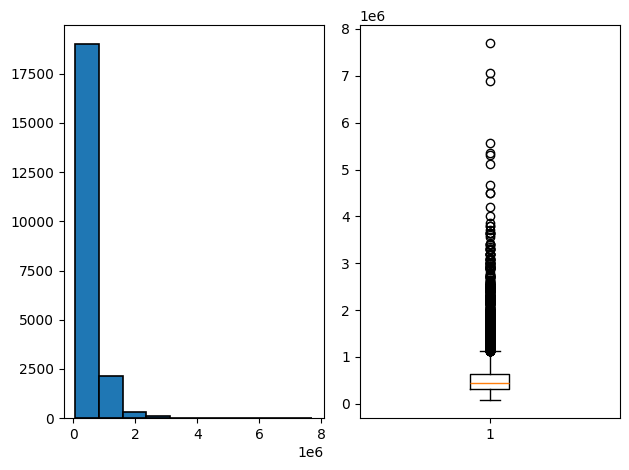

bedrooms


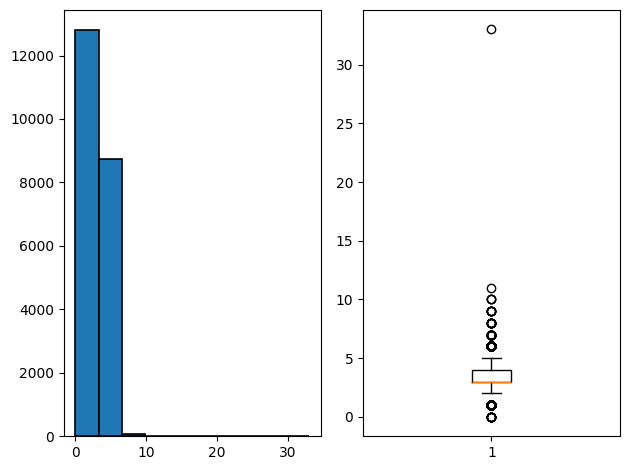

bathrooms


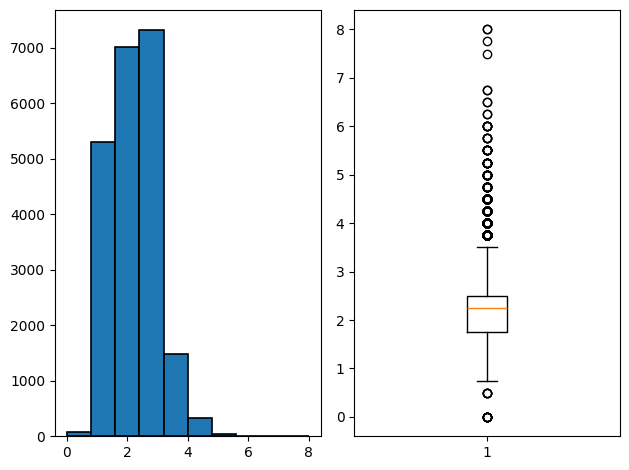

sqft_living


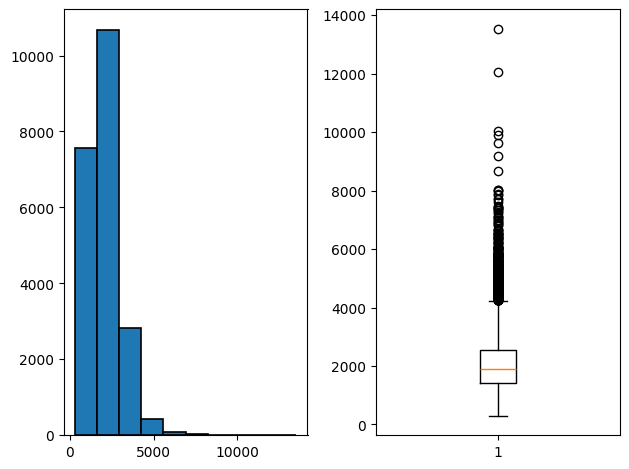

sqft_lot


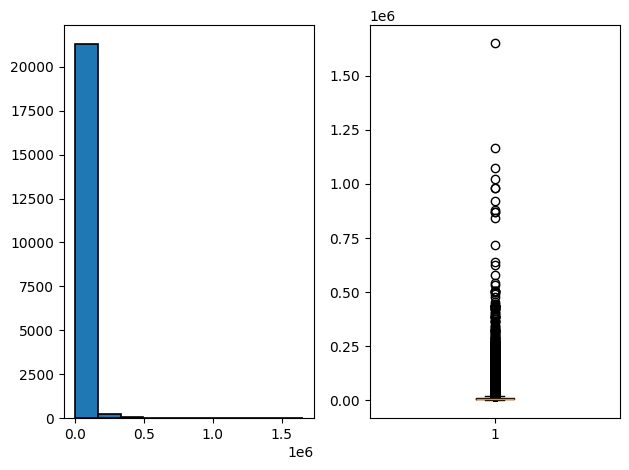

floors


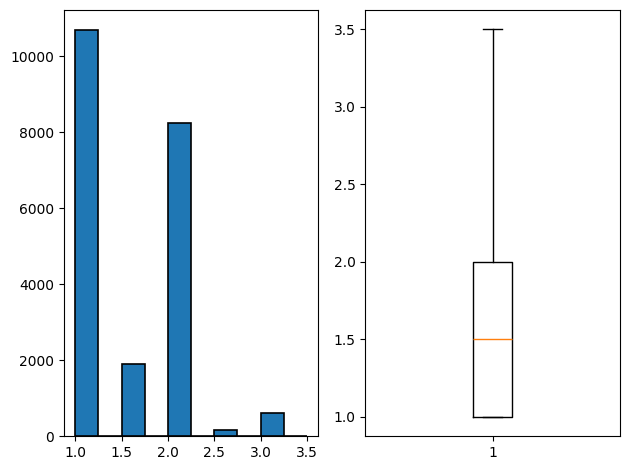

waterfront


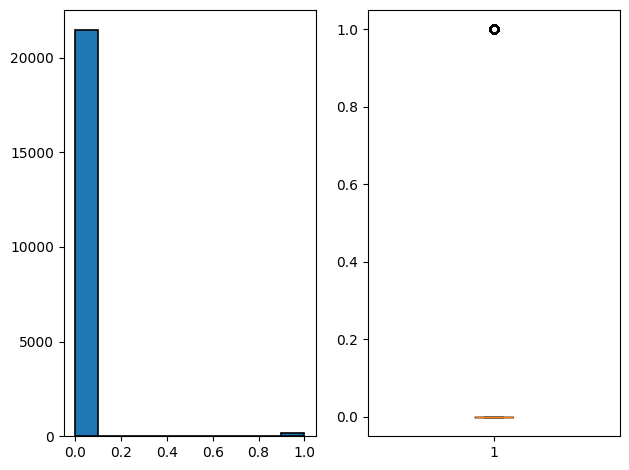

view


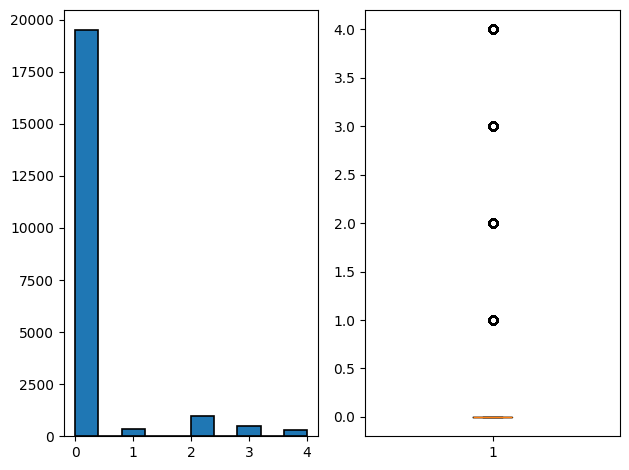

condition


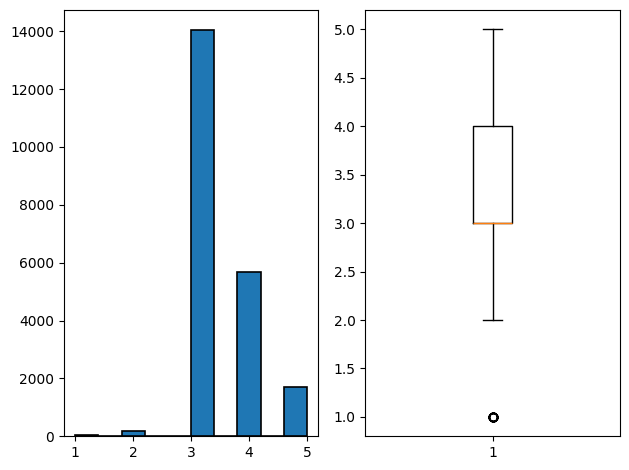

grade


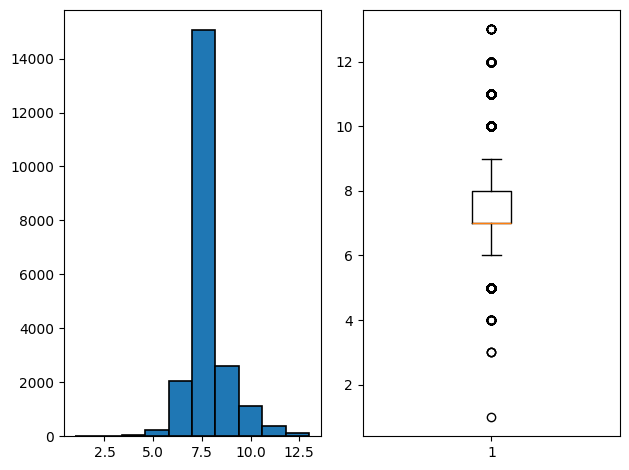

sqft_above


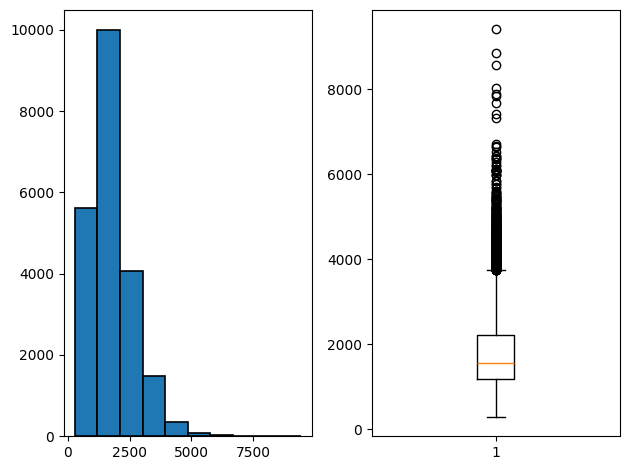

sqft_basement


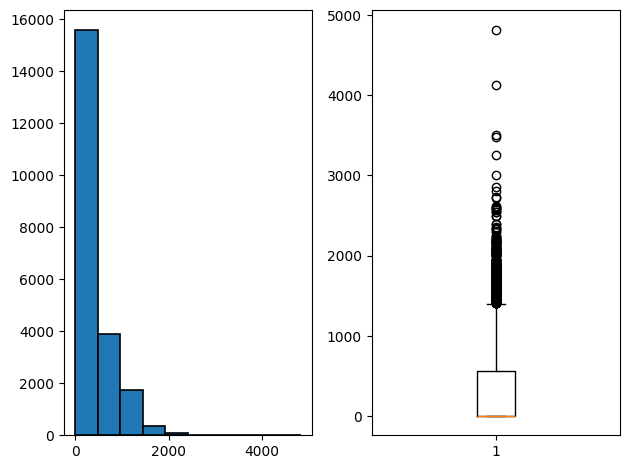

yr_built


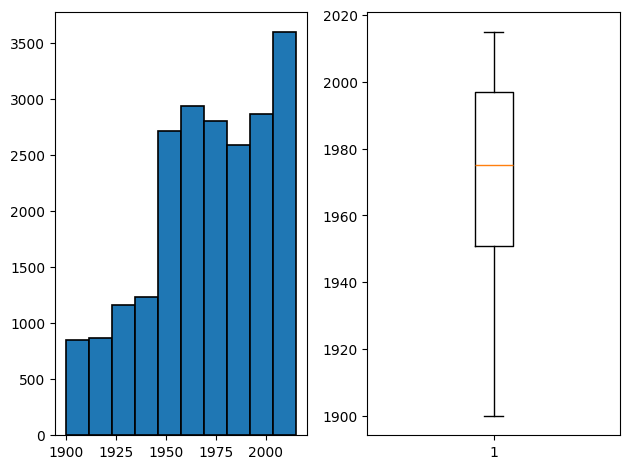

yr_renovated


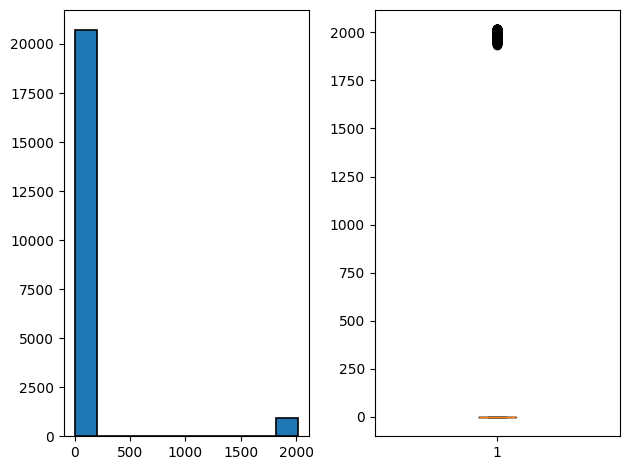

sqft_living15


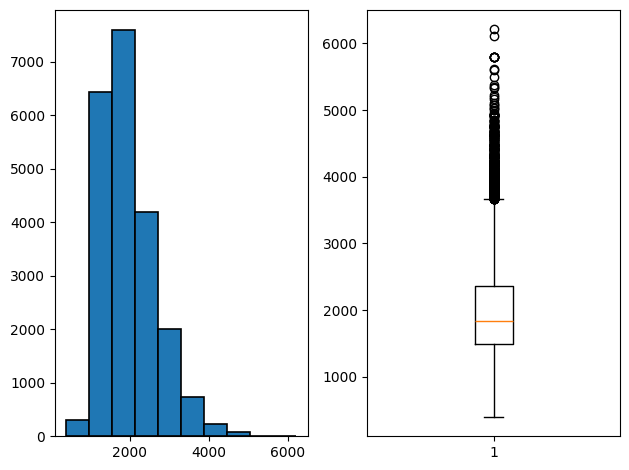

sqft_lot15


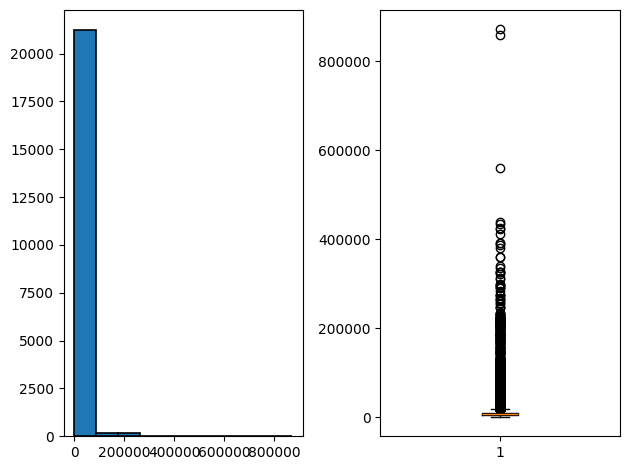

House_Age


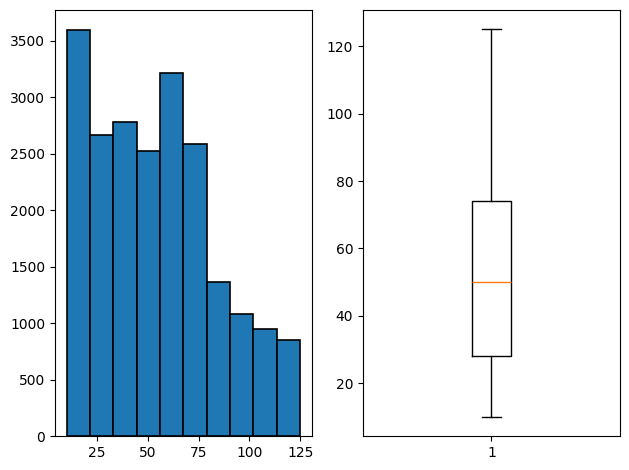

In [14]:
for i in df.columns:
    print(i)
    
    plt.figure()
    plt.subplot(1, 2, 1)
    df[i].hist(grid=False, edgecolor='black',linewidth=1.2)
    
    plt.subplot(1, 2, 2)
    plt.boxplot(df[i])
    
    plt.tight_layout()
    plt.show()

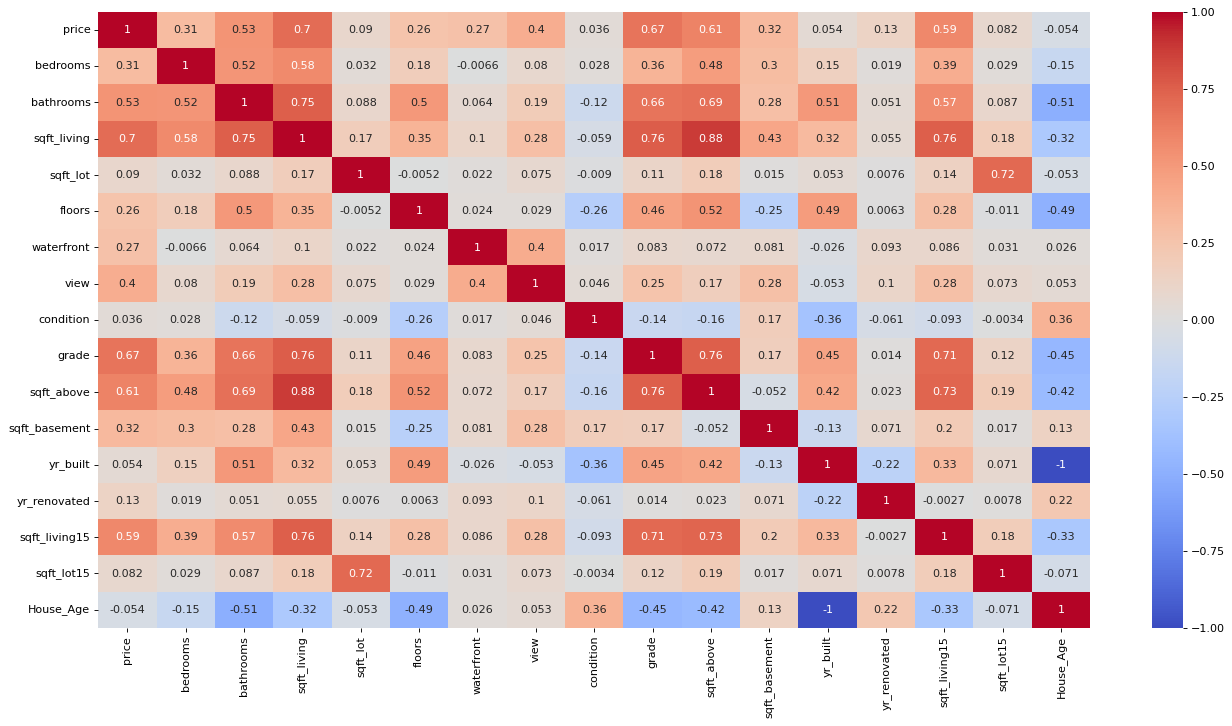

In [15]:
plt.figure(figsize=(20, 10),dpi=80)
corr = df.corr(method='pearson')    
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [16]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view','grade', 'sqft_above','sqft_basement', 'yr_renovated', 'sqft_living15', 'House_Age']]
y = df['price']

In [17]:
scale = StandardScaler()
X = scale.fit_transform(X)
X

array([[-0.39871154, -1.44751897, -0.97980436, ..., -0.21013854,
        -0.94333079,  0.54501342],
       [-0.39871154,  0.17556427,  0.53369548, ...,  4.74644823,
        -0.43268059,  0.68119903],
       [-1.47389933, -1.44751897, -1.42623236, ..., -0.21013854,
         1.07009   ,  1.29403427],
       ...,
       [-1.47389933, -1.77213562, -1.15402016, ..., -0.21013854,
        -1.41021098, -1.29349233],
       [-0.39871154,  0.50018091, -0.52248786, ..., -0.21013854,
        -0.84120075, -1.12326032],
       [-1.47389933, -1.77213562, -1.15402016, ..., -0.21013854,
        -1.41021098, -1.25944593]])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_test

array([[ 0.67647626,  0.50018091,  0.6099149 , ..., -0.21013854,
         0.60320982, -0.9530283 ],
       [-0.39871154,  0.50018091, -0.70759216, ..., -0.21013854,
        -0.35973056,  2.07710154],
       [-0.39871154, -0.14905238, -0.75114611, ..., -0.21013854,
        -1.05421484, -1.15730672],
       ...,
       [-1.47389933, -1.44751897, -1.15402016, ..., -0.21013854,
        -1.14759087,  0.78333823],
       [ 1.75166405,  0.82479756,  0.969235  , ..., -0.21013854,
         1.08468001, -0.23805385],
       [-0.39871154,  0.50018091, -0.05428287, ..., -0.21013854,
         0.67615984, -0.13591464]])

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)
y_pred

array([562507.58506221, 605095.26869658, 334226.48155849, ...,
       212939.91767294, 674188.37657224, 722007.98573132])

In [22]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print('R2:', r2)

RMSE: 50140185277.65295
R2: 0.6643927033546491


In [23]:
print(f'Coefficents: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficents: [-36737.1137049   39752.29736562  72249.93190158  15119.55142912
  44562.21131331  33485.92541743 140830.87205436  59897.00759794
  37862.22893471    909.1219572   18391.59056276 111320.23013602]
Intercept: 540799.3080847597


In [24]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view','grade', 'sqft_above','sqft_basement', 'yr_renovated', 'sqft_living15', 'House_Age']]
y = df['price']

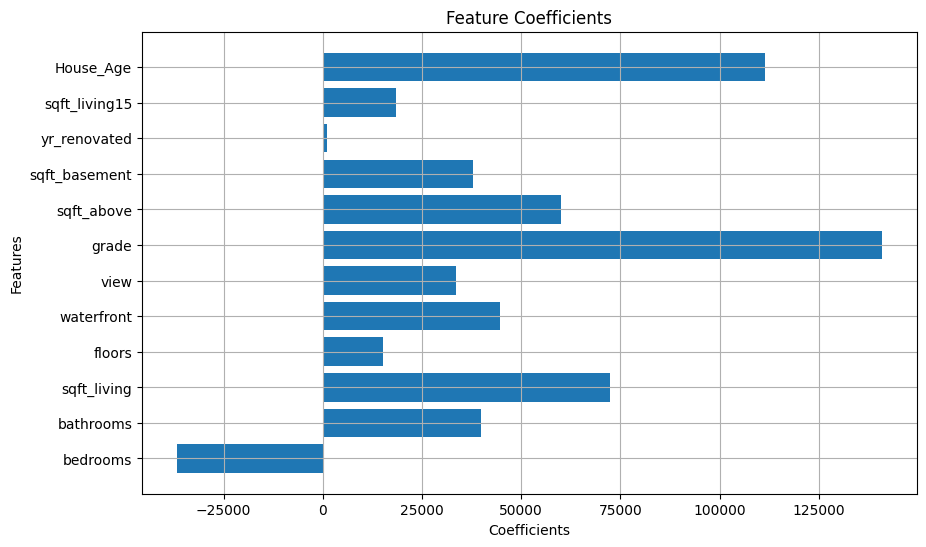

In [25]:
# plotting the coefficients
features = X.columns # Names of the features
coeffecients = model.coef_ # Coefficients of the model

plt.figure(figsize=(10, 6))
plt.barh(features, coeffecients)
plt.title('Feature Coefficients')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.grid(True)
plt.show()

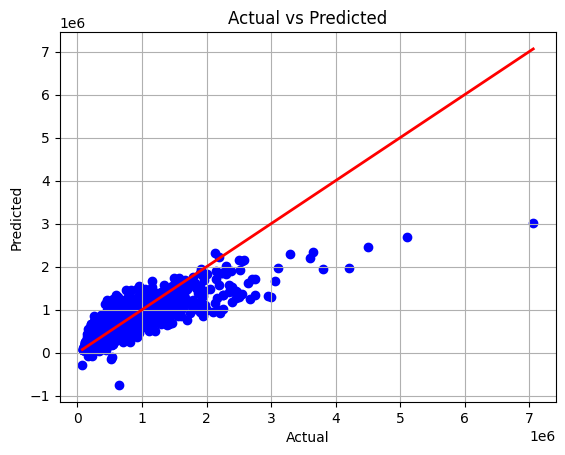

In [27]:
# plotting the actual vs predicted values
plt.Figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  #line of perfect fit
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show() 

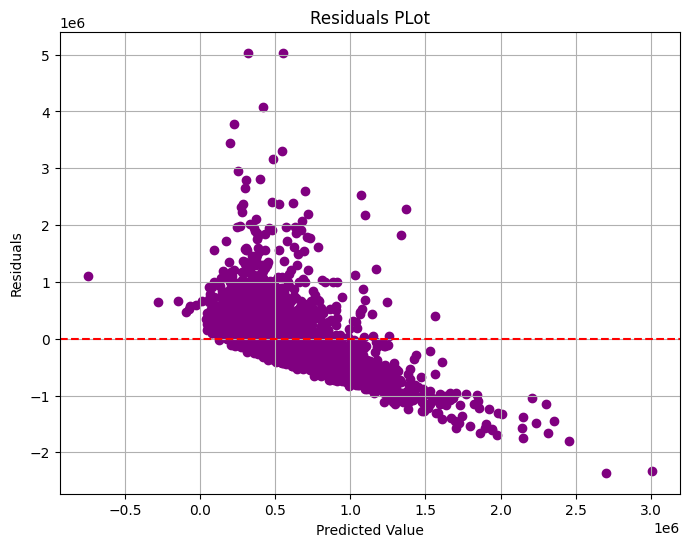

In [ ]:
#calculating the residuals
residuals = Y_test - y_pred

# plotting the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--') # Horizontal line at y=0
plt.title('Residuals PLot')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,House_Age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,1340,5650,70
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,1690,7639,74
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,2720,8062,92
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,1360,5000,60
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,1800,7503,38


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view','grade', 'sqft_above','sqft_basement', 'yr_renovated', 'sqft_living15', 'House_Age'
new_data = [[3, 2, 2000, 2, 0, 0, 8, 2000, 0, 0, 2000, 10]]
new_data = scale.transform(new_data)

#make peredictions
y_pred = model.predict(new_data)
y_pred

array([408184.74464666])